# Ejercicio 16

Usando como target a 'Price' y como variables ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight'], el objetivo de este ejercicio es elegir el conjunto de variables que mayor influencia tiene sobre el target (asumiendo un modelo lineal). Para esto van a utilizar regularizacion con LASSO y Leave-One-Out cross-validation. El objetivo es reproducir el equivalente de la Figura 6.12 y reportar la combinacion de variables que más influencia tiene. Pueden utilizar sklearn.linear_model.Lasso() y sklearn.model_selection.LeaveOneOut().

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn.linear_model
from sklearn.model_selection import LeaveOneOut

In [2]:
def model(x,c,intercept):
    #y=c[0]*np.ones(len(x))
    y=np.ones(len(x))*intercept
    for i in range(len(c)):
        y += c[i]*x[:,i]
    return y

In [4]:
def mse(y_a, y_b): # Mean square error
    d = (y_a - y_b)**2
    return d.mean()

In [2]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']],dtype=float)
Y= np.array(data["Price"],dtype=float)

In [6]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1,normalize=True)
clf.fit(X,Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
clf.coef_

array([-0.        , -0.02787334,  0.        ,  0.11794716,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.11283772,
       -0.        , -0.        ,  0.        ])

In [15]:
loo = LeaveOneOut()
R_2=[]
for train_index, test_index in loo.split(X):
    X_train,X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    clf.fit(X_train,Y_train)
    Y_prec_train = clf.predict(X_train)
    R=mse(Y_train,Y_prec_train)
    #R = np.sum((Y_train-model(X_train,clf.coef_,clf.intercept_))**2)
    R_2.append(R)
#print(np.mean(R_2))

In [34]:
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']],dtype=float)
Y= np.array(data["Price"],dtype=float).reshape(-1,1)

In [38]:
N=1000
A=1E-3
step=A
MSE=np.zeros(N)
alphas=np.zeros(N)
Coef_list=np.zeros((N,len(X[0])))
for i in range(N):
    clf = linear_model.Lasso(alpha=A,normalize=True)
    loo = LeaveOneOut()
    R_2=[]
    for train_index, test_index in loo.split(X):
        X_train,X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train,Y_train)
        Y_prec_train = clf.predict(X_train)
        R=mse(Y_train,Y_prec_train)
        #R = np.sum((Y_train-model(X_train,clf.coef_,clf.intercept_))**2)
        #R= R/len(X_train)
        R_2.append(R)
        Coef_list[i] += clf.coef_ /len(X_train)
    MSE[i]=np.mean(R_2)
    alphas[i]=A
    A+=step

Text(0, 0.5, 'MSE')

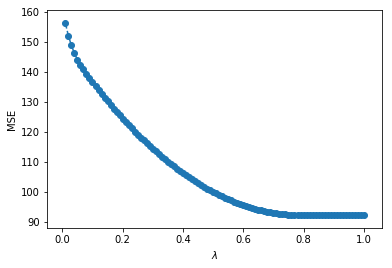

In [36]:
plt.plot(alphas,MSE,"--")
plt.scatter(alphas,MSE)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"MSE")

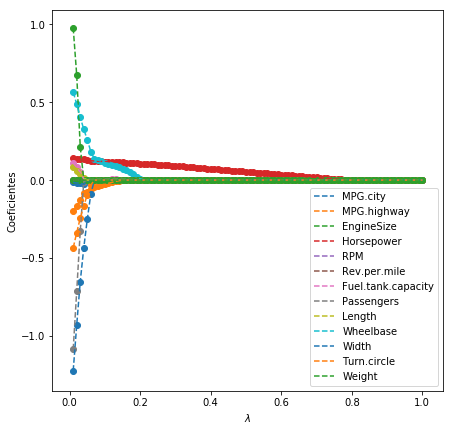

In [37]:
plt.figure(figsize=(7,7))
nombre=['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 
'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 
'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
for i in range(len(Coef_list[0])):
    plt.scatter(alphas,Coef_list[:,i])
    plt.plot(alphas,Coef_list[:,i],"--",label=nombre[i])
plt.legend(loc="lower right")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"Coeficientes")
plt.show()